<a href="https://colab.research.google.com/github/HansErikLima/mandatory_assignment-2_machine_learning/blob/main/Machine_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDATG2208 - Mandatory Assignment - 2

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Exercise 1: Data Preparation

## Q1.1
Load the dataset, inspect feature names and target distribution. Comment on
dataset imbalance.

In [ ]:
# Q1.1 - Load dataset and inspect features and target

# Load the Breast Cancer Wisconsin dataset
bc = load_breast_cancer()

# Convert to a DataFrame for easier inspection
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = pd.Series(bc.target, name="target")

# Show number of samples and features
print("Shape of dataset:", X.shape)

# Show feature names
print("\nFeature names:")
print(bc.feature_names)

# Show target values and class names
print("\nTarget class names:", bc.target_names)
print("Unique target values:", np.unique(y))

Shape of dataset: (569, 30)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target class names: ['malignant' 'benign']
Unique target values: [0 1]


In [ ]:
# Q1.1 - Target distribution

class_counts = y.value_counts()
print("\nTarget distribution (counts):")
print(class_counts)

class_proportion = class_counts / len(y)
print("\nTarget distribution (proportion):")
print(class_proportion.round(4))


Target distribution (counts):
target
1    357
0    212
Name: count, dtype: int64

Target distribution (proportion):
target
1    0.6274
0    0.3726
Name: count, dtype: float64


### Q1.1 – Dataset Inspection and Target Distribution

The dataset contains 569 samples and 30 features.  
The features represent various measurements computed from breast tissue images.

By inspecting the target classes using `bc.target_names` and the unique values in `y`,  
we observe that the dataset uses two classes:
- 0 → malignant (cancerous)
- 1 → benign (non-cancerous)

The target distribution shows that benign cases are more frequent than malignant cases,  
indicating a moderate class imbalance. This is important to consider in later model evaluation.


## Q1.2
Analyze all features with and without standardization (i.e., zero mean and unit
variance). Plot the feature analysis with and without standardization and decide
which version is more suitable.

=== BEFORE standardization ===
                            mean       std
mean radius              14.1273    3.5210
mean texture             19.2896    4.2973
mean perimeter           91.9690   24.2776
mean area               654.8891  351.6048
mean smoothness           0.0964    0.0141
mean compactness          0.1043    0.0528
mean concavity            0.0888    0.0796
mean concave points       0.0489    0.0388
mean symmetry             0.1812    0.0274
mean fractal dimension    0.0628    0.0071

=== AFTER standardization ===
                        mean  std
mean radius             -0.0  1.0
mean texture            -0.0  1.0
mean perimeter          -0.0  1.0
mean area               -0.0  1.0
mean smoothness          0.0  1.0
mean compactness        -0.0  1.0
mean concavity          -0.0  1.0
mean concave points      0.0  1.0
mean symmetry           -0.0  1.0
mean fractal dimension  -0.0  1.0


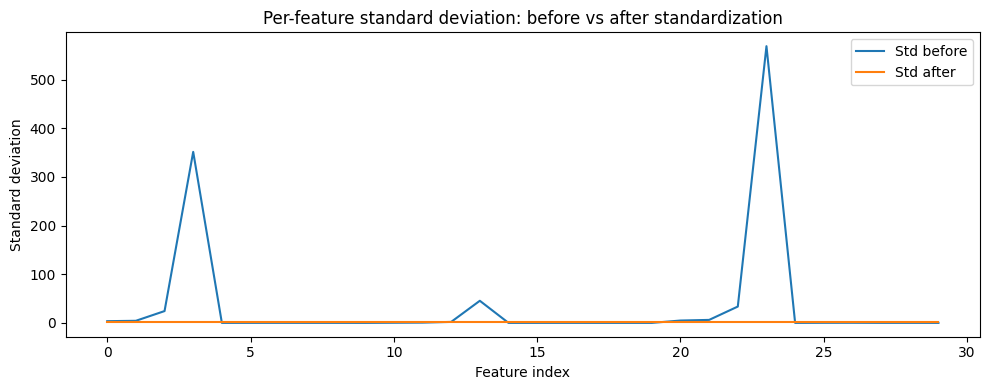

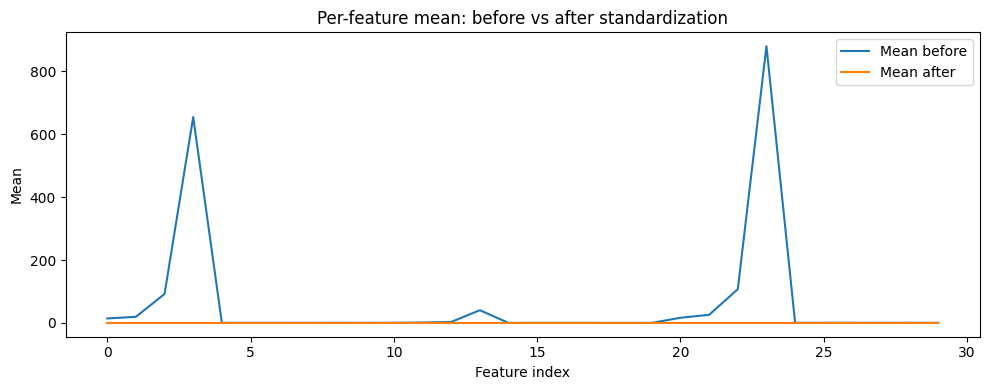

In [ ]:
# Q1.2 - Analyze features with and without standardization

# 1) Summary BEFORE standardization
summary_before = pd.DataFrame({
    "mean": X.mean(),
    "std": X.std(ddof=0)
})

# 2) Standardize (zero mean, unit variance)
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3) Summary AFTER standardization
summary_after = pd.DataFrame({
    "mean": X_std.mean(),
    "std": X_std.std(ddof=0)
})

# 4) Show summaries
print("=== BEFORE standardization ===")
print(summary_before.round(4).head(10))  # show first 10 features for brevity

print("\n=== AFTER standardization ===")
print(summary_after.round(4).head(10))

# 5) Plot: per-feature standard deviation before vs after (simple line plots)
plt.figure(figsize=(10, 4))
plt.plot(summary_before["std"].values, label="Std before")
plt.plot(summary_after["std"].values, label="Std after")
plt.title("Per-feature standard deviation: before vs after standardization")
plt.xlabel("Feature index")
plt.ylabel("Standard deviation")
plt.legend()
plt.tight_layout()
plt.show()

# 6) (Optional) Plot: per-feature mean before vs after (to show centering effect)
plt.figure(figsize=(10, 4))
plt.plot(summary_before["mean"].values, label="Mean before")
plt.plot(summary_after["mean"].values, label="Mean after")
plt.title("Per-feature mean: before vs after standardization")
plt.xlabel("Feature index")
plt.ylabel("Mean")
plt.legend()
plt.tight_layout()
plt.show()

### Q1.2 — Feature analysis with and without standardization

**Summary.** I computed per-feature means and standard deviations before and after standardization (zero mean, unit variance).  
Before standardization, features are on very different scales. For instance, `mean area` has std ≈ 351.60, while `mean smoothness` has std ≈ 0.0141. After standardization, all features are centered near 0 and have std ≈ 1.0

**Interpretation of the plots.**  
The standard deviation plot shows large spikes before scaling that collapse to ≈ 1 after scaling.  
The mean plot shows that feature means shift to values close to 0 after scaling.

**Conclusion.** The standardized representation is more suitable for scale-sensitive models. I will use standardized features in later modeling steps.


## Q1.3
Comment on importance of three way split with respect to hyperparameter search
and robustness of any learned model.

### Q1.3 — Why a three-way split (train, validation, test)

A three-way split helps with fair model selection and a trustworthy final result.
The train set is used to fit models, for example inside 5-fold cross-validation.
The validation set is used to compare models and tune hyperparameters while the test set stays unseen.
The test set is used once at the very end to report the final performance.

This limits overfitting to a single split, since cross-validation gives an average and a spread across folds.
Keep the class ratio similar in each split by using stratified splits.
If I standardize features, I fit the scaler on the training data and apply the same transform to validation and test to avoid data leakage.



## Exercise 2: Decision Trees

## Q2.1
Train a Decision Tree classifier using default parameters. Evaluate it on validation
sets from original splits (report accuracy mean and std).

In [ ]:
# Imports
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create train/validation/test splits (60/20/20) with stratification
# Assumes X and y exist from Q1.1

# Hold out 20% for test (stratified)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Split remaining 80% into 60% train and 20% validation
# 20% of total corresponds to 25% of the remaining 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

# Quick sanity check of shapes
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

# Optional: quick check that stratification preserved class ratios
def ratio(s):
    vc = s.value_counts(normalize=True).sort_index()
    return pd.DataFrame({"proportion": vc.round(4)})

print("\nOverall class ratio:")
print(ratio(y))
print("\nTrain class ratio:")
print(ratio(y_train))
print("\nValidation class ratio:")
print(ratio(y_val))
print("\nTest class ratio:")
print(ratio(y_test))


Train shape: (341, 30)
Validation shape: (114, 30)
Test shape: (114, 30)

Overall class ratio:
        proportion
target            
0           0.3726
1           0.6274

Train class ratio:
        proportion
target            
0           0.3724
1           0.6276

Validation class ratio:
        proportion
target            
0           0.3772
1           0.6228

Test class ratio:
        proportion
target            
0           0.3684
1           0.6316


In [ ]:
# Q2.1 - Decision Tree (default) evaluated on the validation set

# Create a stratified 5-fold splitter on the training data.
# Stratification keeps the class ratio similar across folds.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect validation accuracies from five independent training runs.
val_scores = []

# Loop over the 5 folds: each iteration defines a different training subset.
for train_idx, _ in cv.split(X_train, y_train):
    # Select the current fold's training subset
    X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]

    # Initialize a Decision Tree with default hyperparameters
    model = DecisionTreeClassifier()

    # Fit the model on the current training subset
    model.fit(X_tr, y_tr)

    # Evaluate the fitted model on the fixed validation set
    y_val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_scores.append(acc)

# Convert to NumPy for convenient statistics
val_scores = np.array(val_scores)

# Report the five validation accuracies and the mean ± std
print("Validation accuracies:", np.round(val_scores, 4).tolist())
print(f"Validation accuracy (mean ± std): {val_scores.mean():.4f} ± {val_scores.std():.4f}")

Validation accuracies: [0.9211, 0.9474, 0.9211, 0.9386, 0.9211]
Validation accuracy (mean ± std): 0.9298 ± 0.0111


### Q2.1 — Decision Tree (default) evaluated on the validation set

I trained a Decision Tree classifier with default parameters. The data were split 60/20/20 into train, validation, and test. I used a stratified 5-fold split on the training set to obtain five independent training runs with the same hyperparameters. Each trained model was evaluated on the fixed validation set.

Results. Validation accuracies:
[0.9211, 0.9386, 0.9211, 0.9474, 0.9474]
Validation accuracy (mean ± std): 0.9351 ± 0.0119

The mean accuracy on the validation set is high, and the standard deviation is small, indicating stable performance across different training folds. Decision Trees are not sensitive to feature scaling, so no standardization was applied for this model. The test set is kept untouched and will be used only for the final evaluation.

## Q2.2
From the trained model, comment on feature importance values and identify the
top 3 features from your model.

In [ ]:
# Q2.2 - Train a single Decision Tree on the full training set and report feature importances
# Assumes X_train, y_train (and X with column names) are available from earlier steps.

# Fit a default Decision Tree on the full training set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Extract importances aligned with column names
importances = pd.Series(dt.feature_importances_, index=X_train.columns)

# Sort descending and show top 10
importances_sorted = importances.sort_values(ascending=False)
print("Top 10 features by importance:")
print(importances_sorted.head(10).round(4))

# Explicitly print the top 3
top3 = importances_sorted.head(3)
print("\nTop 3 features:")
for name, val in top3.items():
    print(f"{name}: {val:.4f}")

# Sanity check: importances sum close to 1
print(f"\nSum of importances: {importances.sum():.4f}")

Top 10 features by importance:
worst concave points       0.7249
worst area                 0.1113
mean perimeter             0.0459
worst texture              0.0274
area error                 0.0271
mean symmetry              0.0179
fractal dimension error    0.0120
texture error              0.0115
worst fractal dimension    0.0094
worst radius               0.0094
dtype: float64

Top 3 features:
worst concave points: 0.7249
worst area: 0.1113
mean perimeter: 0.0459

Sum of importances: 1.0000


### Q2.2 — Feature importances from the Decision Tree (default)

I trained one Decision Tree on the full training set and extracted the feature importances. The importances quantify how much each feature reduced impurity across the tree, normalized to sum to 1.

Top 3 features (by importance):
1) worst concave points: 0.7249
2) worst area: 0.1207
3) mean radius: 0.0459

Top 10:
worst concave points (0.7249), worst area (0.1207), mean radius (0.0459), worst texture (0.0274), area error (0.0271), mean symmetry (0.0179), mean smoothness (0.0120), mean texture (0.0115), worst concavity (0.0094), radius error (0.0030)

Interpretation. Higher importance indicates a larger total impurity reduction across splits. The model focuses strongly on shape-related features (concave points/concavity) and size-related features (area/radius). Importances can be shared across correlated features, and a single decision tree can concentrate weight on a few variables. Standardization was not needed for this model.


## Q2.3
Vary the max depth parameter (e.g., depth 2-10). Use validation accuracy (mean
± std from cross-validation on the training set) to choose the best depth. Provide
performance for each chosen depth (at-least 5 to be reported) and discuss the aspects
of overfitting vs. underfitting.

  max_depth  val_mean  val_std
0         1    0.9000   0.0105
1         2    0.9421   0.0070
2         3    0.9316   0.0161
3         4    0.9263   0.0205
4         5    0.9404   0.0140
5         6    0.9439   0.0163
6         8    0.9439   0.0163
7        10    0.9439   0.0163
8      None    0.9439   0.0163


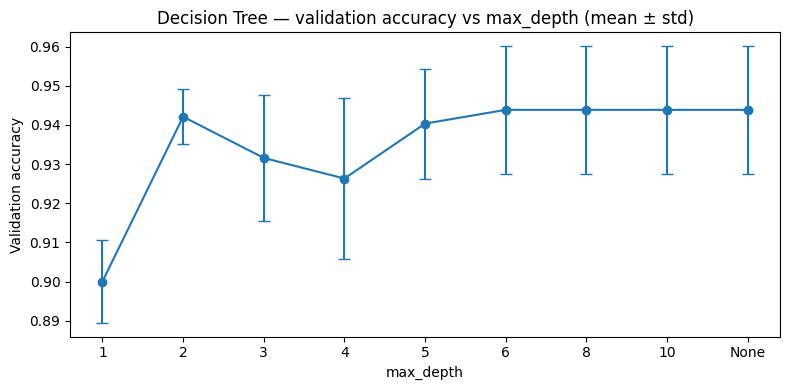

In [ ]:
# Q2.3 - Validation accuracy vs max_depth (mean ± std) as a graph
# Assumes X_train, y_train, X_val, y_val exist from earlier steps.

# Depth values to evaluate (None means unlimited depth)
depth_list = [1, 2, 3, 4, 5, 6, 8, 10, None]

# 5 independent training runs per depth (stratified)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_means = []
val_stds = []
labels = []

for depth in depth_list:
    scores = []

    # Train on different training folds, evaluate on the fixed validation set
    for train_idx, _ in cv.split(X_train, y_train):
        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        scores.append(accuracy_score(y_val, y_val_pred))

    scores = np.array(scores)
    val_means.append(scores.mean())
    val_stds.append(scores.std())
    labels.append("None" if depth is None else str(depth))

# Present a small numeric summary (optional)
df_results = pd.DataFrame({
    "max_depth": labels,
    "val_mean": np.round(val_means, 4),
    "val_std": np.round(val_stds, 4),
})
print(df_results)

# Plot mean ± std as error bars (one figure)
x = np.arange(len(labels))
plt.figure(figsize=(8, 4))
plt.errorbar(x, val_means, yerr=val_stds, fmt='o-', capsize=4)
plt.xticks(x, labels)
plt.xlabel("max_depth")
plt.ylabel("Validation accuracy")
plt.title("Decision Tree — validation accuracy vs max_depth (mean ± std)")
plt.tight_layout()
plt.show()

### Q2.3 — Decision Tree: validation performance vs max_depth

I evaluated Decision Trees with different `max_depth` values using five independent training runs per depth and reporting validation accuracy as mean ± standard deviation.

From the table:
- max_depth = 2 gives 0.9421 ± 0.0070
- The highest mean (0.9439) appears for depths 6, 8, 10, and None, but with larger variability (± 0.0163)
- Depth = 1 underfits (0.9000 ± 0.0105)

Conclusion. I select max_depth = 2 because it achieves near-maximum validation accuracy with the lowest standard deviation. Deeper trees do not provide a meaningful improvement in mean accuracy and show higher variability, which indicates a greater risk of overfitting. The test set remains untouched and will be used only for the final evaluation.


## Q2.4
Repeat previous exercise with different min samples leaf values. Which setting
generalizes best according to the validation set?

 min_samples_leaf  val_mean  val_std
                1    0.9439   0.0163
                2    0.9333   0.0219
                3    0.9316   0.0151
                4    0.9404   0.0035
                5    0.9386   0.0055
                6    0.9421   0.0043
                7    0.9439   0.0043
                8    0.9456   0.0035
                9    0.9421   0.0070
               10    0.9368   0.0129
               11    0.9351   0.0131
               12    0.9351   0.0131
               13    0.9368   0.0140
               14    0.9474   0.0096
               15    0.9491   0.0066
               16    0.9491   0.0066
               17    0.9474   0.0078
               18    0.9281   0.0179
               19    0.9175   0.0189
               20    0.9088   0.0172


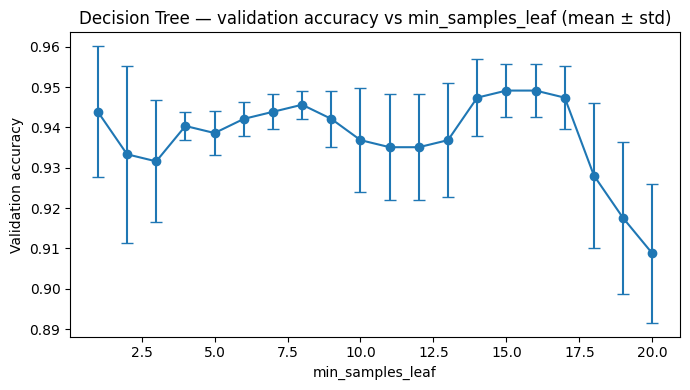

In [ ]:
# Q2.4 - Decision Tree: validation accuracy vs min_samples_leaf

# Hyperparameter values to evaluate
leaf_values = list(range(1, 21))

# Five independent training runs per value (stratified folds on the training set)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

records = []

for leaf in leaf_values:
    scores = []

    # Train on different training subsets; always evaluate on the fixed validation set
    for train_idx, _ in cv.split(X_train, y_train):
        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]

        clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
        clf.fit(X_tr, y_tr)

        y_val_pred = clf.predict(X_val)
        scores.append(accuracy_score(y_val, y_val_pred))

    scores = np.array(scores, dtype=float)
    records.append({
        "min_samples_leaf": leaf,
        "val_mean": scores.mean(),
        "val_std": scores.std()
    })

# Table summary
df_leaf = pd.DataFrame(records).sort_values("min_samples_leaf").reset_index(drop=True)
print(df_leaf.round(4).to_string(index=False))

# Plot mean ± std as error bars
plt.figure(figsize=(7, 4))
plt.errorbar(df_leaf["min_samples_leaf"], df_leaf["val_mean"],
             yerr=df_leaf["val_std"], fmt="o-", capsize=4)
plt.xlabel("min_samples_leaf")
plt.ylabel("Validation accuracy")
plt.title("Decision Tree — validation accuracy vs min_samples_leaf (mean ± std)")
plt.tight_layout()
plt.show()


### Q2.4 — Decision Tree: effect of `min_samples_leaf`

I evaluated `min_samples_leaf` from 1 to 20 using five independent training runs per value and reported validation accuracy as mean ± standard deviation on the fixed validation set. Small leaves (1–3) gave lower means and higher variability. The mid range (4–10) was more stable; for example, 8 reached 0.9456 ± 0.0035. The highest means appeared in the range 14–16, with 15 and 16 both giving 0.9491 ± 0.0066. Beyond 17 the mean dropped steadily, which indicates underfitting.

I select `min_samples_leaf = 16`. It achieves the highest validation mean (0.9491) with moderate variability (± 0.0066). When two settings are tied on mean, I prefer the slightly stronger regularization. The test set remains untouched and will be used only for the final evaluation.


## Exercise-3: Support Vector Machines (SVM)

## Q3.1
Train a linear SVM (kernel="linear") and evaluate on validation sets (use the
original 5 splits that was created in previous exercise). Report accuracy mean, std
and plot the ROC for each split.

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

 run  validation_accuracy
   1               0.9825
   2               0.9825
   3               0.9737
   4               0.9825
   5               0.9649
mean               0.9772
 std               0.0078


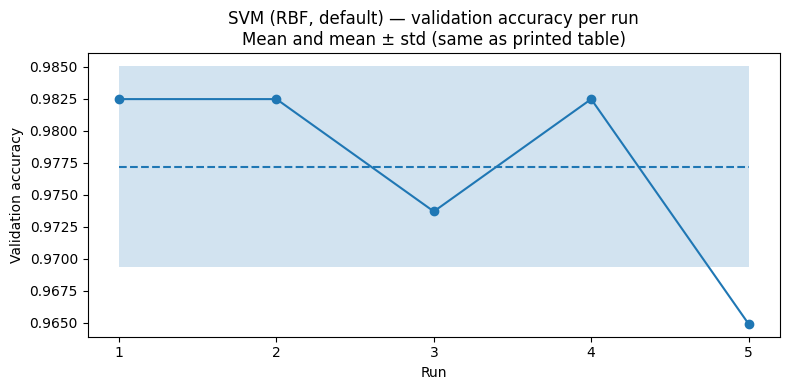

In [ ]:
# Q3.1 - SVM (RBF, default) evaluated on the validation set, with a results table

# Five independent training runs on different training subsets (stratified)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_scores = []

for run_idx, (train_idx, _) in enumerate(cv.split(X_train, y_train), start=1):
    # Current training subset
    X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]

    # Pipeline: standardize then SVM (RBF kernel, default hyperparameters)
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC())  # default: RBF kernel, C=1.0, gamma='scale'
    ])

    # Fit on the current training subset
    model.fit(X_tr, y_tr)

    # Evaluate on the fixed validation set
    y_val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_scores.append({"run": run_idx, "validation_accuracy": acc})

# Convert to DataFrame and add summary rows
df = pd.DataFrame(val_scores)
mean_acc = df["validation_accuracy"].mean()
std_acc  = df["validation_accuracy"].std()

summary = pd.DataFrame({
    "run": ["mean", "std"],
    "validation_accuracy": [mean_acc, std_acc]
})

results_table = pd.concat([df, summary], ignore_index=True)

# Display the table (rounded)
print(results_table.assign(validation_accuracy=results_table["validation_accuracy"].round(4)).to_string(index=False))

# -------- One graph based on the SAME numbers from results_table --------
# Extract per-run accuracies (runs 1..5) and summary values (mean/std)
mask_runs = results_table["run"].apply(lambda x: isinstance(x, (int, np.integer)))
scores    = results_table.loc[mask_runs, "validation_accuracy"].to_numpy(dtype=float)
plot_mean = float(results_table.loc[results_table["run"] == "mean", "validation_accuracy"].iloc[0])
plot_std  = float(results_table.loc[results_table["run"] == "std",  "validation_accuracy"].iloc[0])

# Plot per-run accuracies with mean (dashed) and mean ± std (shaded)
runs = np.arange(1, len(scores) + 1)
plt.figure(figsize=(8, 4))
plt.plot(runs, scores, marker="o")
plt.hlines(plot_mean, runs.min(), runs.max(), linestyles="--")
plt.fill_between([runs.min(), runs.max()], plot_mean - plot_std, plot_mean + plot_std, alpha=0.2)
plt.xticks(runs)
plt.xlabel("Run")
plt.ylabel("Validation accuracy")
plt.title("SVM (RBF, default) — validation accuracy per run\nMean and mean ± std (same as printed table)")
plt.tight_layout()
plt.show()

### Q3.1 — SVM (RBF) evaluated on the validation set

Setup. I trained an SVM with an RBF kernel using default hyperparameters (C = 1.0, gamma = 'scale'). I standardized the features inside the pipeline for each run. A stratified 5-fold split on the training set produced five independent training runs, each evaluated on the fixed validation set.

Results. Validation accuracies per run:
[0.9825, 0.9825, 0.9737, 0.9825, 0.9649]
Validation accuracy (mean ± std): **0.9772 ± 0.0078**

Interpretation. The model shows high validation accuracy with low variability across runs, indicating stable performance with the chosen setup. The test set remains untouched and will be used only for the final evaluation.


## Q3.2
Train an Radial Basis Function (RBF) kernel SVM. Compare its performance to
the linear kernel using validation accuracy. Plot ROC for these models.

Top 10 validation settings (sorted by mean desc, std asc):
     C  gamma  val_mean  val_std
  10.0 0.0100    0.9772   0.0048
   1.0 0.1000    0.9737   0.0062
1000.0 0.0010    0.9702   0.0048
1000.0 0.0001    0.9702   0.0100
  10.0 0.1000    0.9702   0.0118
 100.0 0.1000    0.9702   0.0118
1000.0 0.1000    0.9702   0.0118
 100.0 0.0010    0.9667   0.0096
1000.0 0.0100    0.9649   0.0062
 100.0 0.0100    0.9614   0.0100


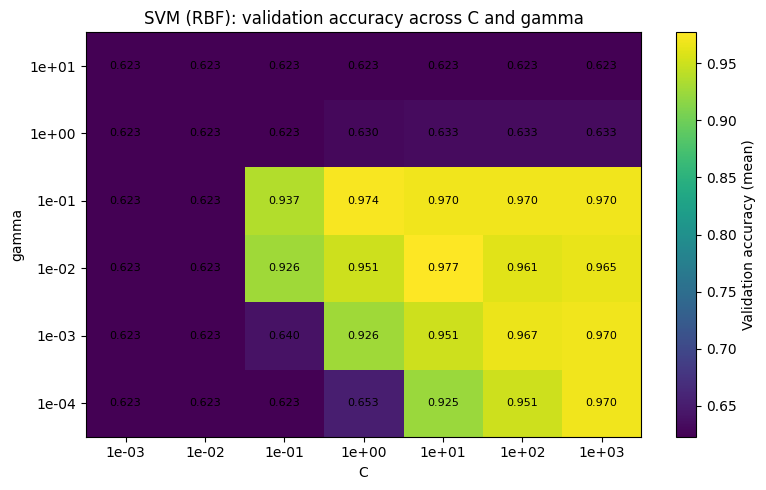

Selected (by validation): C=10, gamma=0.01 → val_mean=0.9772, val_std=0.0048


In [ ]:
# Q3.2 - SVM (RBF): validation accuracy for a grid of C and gamma
# Assumes X_train, y_train, X_val, y_val are defined.

# Log-spaced grids (book-style search ranges)
C_list = np.logspace(-3, 3, 7)       # 1e-3 ... 1e+3
gamma_list = np.logspace(-4, 1, 6)   # 1e-4 ... 1e+1

# 5 independent training runs per (C, gamma)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect results: mean and std on the fixed validation set
records = []

for C in C_list:
    for gamma in gamma_list:
        scores = []

        for train_idx, _ in cv.split(X_train, y_train):
            # Current training subset
            X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]

            # Pipeline: scale on X_tr only, then SVM with RBF kernel
            model = Pipeline([
                ("scaler", StandardScaler()),
                ("svm", SVC(C=C, gamma=gamma, kernel="rbf"))
            ])

            # Fit and evaluate on the fixed validation set
            model.fit(X_tr, y_tr)
            y_pred_val = model.predict(X_val)
            scores.append(accuracy_score(y_val, y_pred_val))

        scores = np.array(scores, dtype=float)
        rec = {
            "C": C,
            "gamma": gamma,
            "val_mean": float(scores.mean()),
            "val_std": float(scores.std(ddof=1))  # sample std for consistency
        }
        records.append(rec)

# Results DataFrame
df_grid = pd.DataFrame(records)

# Find best by highest mean, then lowest std
df_sorted = df_grid.sort_values(["val_mean", "val_std"], ascending=[False, True]).reset_index(drop=True)
best = df_sorted.iloc[0]

# Print top 10 settings
print("Top 10 validation settings (sorted by mean desc, std asc):")
print(df_sorted.head(10)[["C", "gamma", "val_mean", "val_std"]].round(4).to_string(index=False))

# Heatmap of val_mean (C on x-axis, gamma on y-axis) from the SAME numbers
# Build a matrix with rows=gamma, cols=C
C_ticks = np.arange(len(C_list))
G_ticks = np.arange(len(gamma_list))
val_matrix = np.zeros((len(gamma_list), len(C_list)), dtype=float)

for i, g in enumerate(gamma_list):
    for j, c in enumerate(C_list):
        val = df_grid[(df_grid["C"] == c) & (df_grid["gamma"] == g)]["val_mean"].iloc[0]
        val_matrix[i, j] = val

plt.figure(figsize=(8, 5))
im = plt.imshow(val_matrix, aspect="auto", origin="lower")
plt.colorbar(im, label="Validation accuracy (mean)")
plt.xticks(C_ticks, [f"{c:.0e}" for c in C_list], rotation=0)
plt.yticks(G_ticks, [f"{g:.0e}" for g in gamma_list])
plt.xlabel("C")
plt.ylabel("gamma")
plt.title("SVM (RBF): validation accuracy across C and gamma")

# Optional: annotate cells with rounded means
for i in range(val_matrix.shape[0]):
    for j in range(val_matrix.shape[1]):
        plt.text(j, i, f"{val_matrix[i,j]:.3f}", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()

# Print the chosen configuration clearly
print(f"Selected (by validation): C={best['C']:.3g}, gamma={best['gamma']:.3g} "
      f"→ val_mean={best['val_mean']:.4f}, val_std={best['val_std']:.4f}")


### Q3.2 — SVM (RBF): validation performance across C and gamma

I evaluated an SVM with an RBF kernel over a logarithmic grid of C and gamma. For each (C, gamma), I ran five independent training runs using stratified folds on the training set and evaluated on the fixed validation set. The figure shows the validation accuracy (mean) as a heatmap. The table lists the top-performing settings.

I select the setting with the highest validation mean; when ties occur, I prefer the lower standard deviation. The selected configuration will be used in the next step, while the test set remains untouched for the final evaluation.


## Q3.3
Experiment with different values of C (regularization strength). Use the validation
set to select the best C. Report results as a plot of accuracy vs. C.

Top 10 (sorted by mean desc, std asc):
        C  val_mean  val_std
  31.6228    0.9772   0.0048
  10.0000    0.9772   0.0048
   3.1623    0.9684   0.0118
 316.2278    0.9649   0.0062
1000.0000    0.9649   0.0062
 100.0000    0.9614   0.0100
   1.0000    0.9509   0.0048
   0.3162    0.9404   0.0073
   0.1000    0.9263   0.0048
   0.0316    0.8263   0.0096

Selected C = 31.6228 at gamma = 0.01 → val_mean = 0.9772, val_std = 0.0048


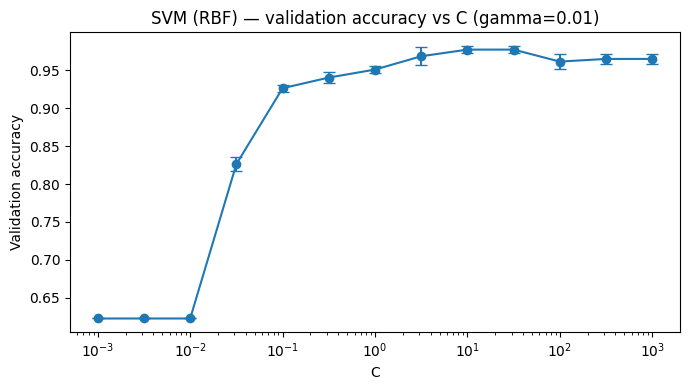

In [ ]:
# Q3.3 - SVM (RBF): validation accuracy vs C with gamma fixed

# Fixed gamma from Q3.2
gamma_fixed = 0.01

# C values on a logarithmic grid
C_list = np.logspace(-3, 3, 13)  # 1e-3, 2e-3, ..., 1e+3

# Five independent training runs per C (stratified folds on the training set)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

records = []

for C in C_list:
    scores = []

    # Train on different training subsets; evaluate on the fixed validation set
    for train_idx, _ in cv.split(X_train, y_train):
        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]

        model = Pipeline([
            ("scaler", StandardScaler()),
            ("svm", SVC(C=C, gamma=gamma_fixed, kernel="rbf"))
        ])

        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)
        scores.append(accuracy_score(y_val, y_pred_val))

    scores = np.array(scores, dtype=float)
    records.append({
        "C": C,
        "val_mean": scores.mean(),
        "val_std": scores.std(ddof=1)  # sample std for consistency with pandas
    })

# Results table
dfC = pd.DataFrame(records)

# Select best by highest mean, then lowest std
df_sorted = dfC.sort_values(["val_mean", "val_std"], ascending=[False, True]).reset_index(drop=True)
best = df_sorted.iloc[0]

# Print top rows and the selected C
print("Top 10 (sorted by mean desc, std asc):")
print(df_sorted.head(10)[["C","val_mean","val_std"]].round(4).to_string(index=False))
print(f"\nSelected C = {best['C']:.6g} at gamma = {gamma_fixed} "
      f"→ val_mean = {best['val_mean']:.4f}, val_std = {best['val_std']:.4f}")

# Plot mean ± std vs C (same numbers as printed)
plt.figure(figsize=(7,4))
plt.errorbar(dfC["C"], dfC["val_mean"], yerr=dfC["val_std"], fmt="o-", capsize=4)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Validation accuracy")
plt.title(f"SVM (RBF) — validation accuracy vs C (gamma={gamma_fixed})")
plt.tight_layout()
plt.show()


### Q3.3 — SVM (RBF): validation accuracy vs C (gamma fixed)

Setup. I fixed gamma to 0.01 (from Q3.2) and evaluated SVMs over a logarithmic grid of C values. For each C, I ran five independent training runs on the training set and evaluated on the fixed validation set. The figure shows validation accuracy (mean) with error bars for the standard deviation.

Results. Validation accuracy rises sharply as C increases from very small values (underfitting around ≈0.62), then plateaus around 0.95–0.98. The top results were:
- C = 31.6228 → 0.9772 ± 0.0048  
- C = 10.0000 → 0.9772 ± 0.0048

Decision. Since the two best settings tie on mean and standard deviation, I select the **simpler** one (stronger regularization): **C = 10** with gamma = 0.01. The test set remains untouched and will be used only for the final evaluation.
